#### Population and Density of population per District in Zurich

Population and Density Data is taken from https://de.wikipedia.org/wiki/Stadtteile_der_Stadt_Z%C3%BCrich

Geospatial Data is taken from https://data.stadt-zuerich.ch/dataset/geo_stadtkreise/resource/0018ad48-69a5-4ea7-923e-9d3587bfdec9

In [45]:
import pandas as pd
import geopandas as gpd
import numpy as np
import xlrd
from bokeh.io import output_file, show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
import json

In [81]:
file = "plz/AV_PLZ_ORTSCHAFTEN_F.shp"
sw = gpd.read_file(file)
sw

,ORTSCHAFTS,PLZ,ZUSATZZIFF,ONRP,BFSNR,SHAPE_AREA,SHAPE_LEN,geometry
0,Rheinau,8462,00,4770,38,8.856894e+06,21571.554462,"POLYGON ((2689384.140 1278198.417, 2689440.560..."
1,Bubikon,8608,00,4950,112,8.523285e+06,17748.704440,"POLYGON ((2701800.986 1236310.304, 2701804.755..."
2,Hagenbuch ZH,8523,00,4829,220,8.028154e+06,16222.302454,"POLYGON ((2706255.330 1263240.638, 2706274.280..."
3,Niederweningen,8166,00,4540,91,6.844657e+06,16979.389098,"POLYGON ((2670446.050 1259386.061, 2670391.209..."
4,Bertschikon,8543,00,5894,298,6.676113e+06,20899.863480,"POLYGON ((2704678.593 1263174.543, 2704677.999..."
...,...,...,...,...,...,...,...,...
427,Bülach,8180,00,4546,58,1.524052e+04,514.361372,"POLYGON ((2682095.260 1267300.906, 2681977.546..."
428,Unterengstringen,8103,00,4495,4048,1.486939e+04,538.015015,"POLYGON ((2675589.028 1251376.912, 2675605.748..."
429,Rorbas,8427,03,6068,56,1.335874e+04,464.929041,"POLYGON ((2686139.305 1264237.443, 2686163.766..."
430,Bauma,8494,00,4796,114,6.796434e+03,346.158720,"POLYGON ((2711935.127 1246461.585, 2711941.305..."


In [91]:
PLZ_subset = ["8001", "8003", "8004", "8005", "8008", "8021", "8032", "8037", 
              "8045", "8046", "8048", "8050", "8051", "8052", "8055", "8057"]
sw_zh = sw[sw["ORTSCHAFTS"] == "Zürich"]
sw_zh

,ORTSCHAFTS,PLZ,ZUSATZZIFF,ONRP,BFSNR,SHAPE_AREA,SHAPE_LEN,geometry
6,Zürich,8049,00,4467,261,6.538555e+06,15191.621696,"POLYGON ((2678346.247 1252668.001, 2678358.585..."
18,Zürich,8047,00,4463,261,2.937783e+06,9876.993829,"POLYGON ((2680173.913 1247871.414, 2680151.466..."
39,Zürich,8032,00,4441,261,3.230471e+06,10601.239827,"POLYGON ((2683983.783 1247666.467, 2683979.830..."
63,Zürich,8044,00,4457,261,5.743087e+06,14597.875900,"POLYGON ((2685339.845 1249599.741, 2685343.171..."
76,Zürich,8003,00,4387,261,1.420236e+06,8274.154028,"POLYGON ((2680380.273 1248376.624, 2680390.116..."
88,Zürich,8052,00,4471,261,3.932146e+06,11240.121599,"POLYGON ((2684275.114 1253798.453, 2684277.794..."
91,Zürich,8041,00,4454,261,4.539277e+06,10764.929231,"POLYGON ((2680368.600 1243377.402, 2680387.239..."
94,Zürich,8002,00,4386,261,2.372416e+06,6824.440225,"POLYGON ((2682086.238 1245115.902, 2682057.421..."
102,Zürich,8041,00,4454,131,1.241580e+04,468.614942,"POLYGON ((2681299.737 1241879.691, 2681305.370..."
104,Zürich,8052,00,4471,66,3.697353e+03,275.033078,"POLYGON ((2684732.686 1252508.365, 2684806.630..."


In [104]:
f = "data/supermarket_count.csv"
shops = pd.read_csv(f, engine="python")
shops.head()

,PLZ,num_all,num_migros
0,5400,1,0
1,8001,26,6
2,8002,6,3
3,8003,9,1
4,8004,26,6


In [106]:
pop_geo = sw_zh.merge(shops, left_on = "PLZ", right_on = "PLZ")
pop_geo.head()

,ORTSCHAFTS,PLZ,ZUSATZZIFF,ONRP,BFSNR,SHAPE_AREA,SHAPE_LEN,geometry,num_all,num_migros
0,Zürich,8049,00,4467,261,6.538555e+06,15191.621696,"POLYGON ((2678346.247 1252668.001, 2678358.585...",7,1
1,Zürich,8047,00,4463,261,2.937783e+06,9876.993829,"POLYGON ((2680173.913 1247871.414, 2680151.466...",11,3
2,Zürich,8032,00,4441,261,3.230471e+06,10601.239827,"POLYGON ((2683983.783 1247666.467, 2683979.830...",9,0
3,Zürich,8044,00,4457,261,5.743087e+06,14597.875900,"POLYGON ((2685339.845 1249599.741, 2685343.171...",5,1
4,Zürich,8003,00,4387,261,1.420236e+06,8274.154028,"POLYGON ((2680380.273 1248376.624, 2680390.116...",9,1


In [107]:
pop_geo2 = pop_geo
pop_geo2["migros_per_all_shops"] = pop_geo2["num_migros"].divide(pop_geo2["num_all"])
pop_geo2

,ORTSCHAFTS,PLZ,ZUSATZZIFF,ONRP,BFSNR,SHAPE_AREA,SHAPE_LEN,geometry,num_all,num_migros,migros_per_all_shops
0,Zürich,8049,00,4467,261,6.538555e+06,15191.621696,"POLYGON ((2678346.247 1252668.001, 2678358.585...",7,1,0.142857
1,Zürich,8047,00,4463,261,2.937783e+06,9876.993829,"POLYGON ((2680173.913 1247871.414, 2680151.466...",11,3,0.272727
2,Zürich,8032,00,4441,261,3.230471e+06,10601.239827,"POLYGON ((2683983.783 1247666.467, 2683979.830...",9,0,0.000000
3,Zürich,8044,00,4457,261,5.743087e+06,14597.875900,"POLYGON ((2685339.845 1249599.741, 2685343.171...",5,1,0.200000
4,Zürich,8003,00,4387,261,1.420236e+06,8274.154028,"POLYGON ((2680380.273 1248376.624, 2680390.116...",9,1,0.111111
5,Zürich,8052,00,4471,261,3.932146e+06,11240.121599,"POLYGON ((2684275.114 1253798.453, 2684277.794...",8,2,0.250000
6,Zürich,8052,00,4471,66,3.697353e+03,275.033078,"POLYGON ((2684732.686 1252508.365, 2684806.630...",8,2,0.250000
7,Zürich,8052,00,4471,97,9.448835e+04,1871.731914,"POLYGON ((2682876.971 1253984.776, 2682889.375...",8,2,0.250000
8,Zürich,8041,00,4454,261,4.539277e+06,10764.929231,"POLYGON ((2680368.600 1243377.402, 2680387.239...",4,2,0.500000
9,Zürich,8041,00,4454,131,1.241580e+04,468.614942,"POLYGON ((2681299.737 1241879.691, 2681305.370...",4,2,0.500000


In [ ]:
pop_geo.to_csv("pop_dens_districts.csv")

In [47]:
# Read shapefile and examine data
zh1 = gpd.read_file('data/stzh.adm_stadtkreise_a_polygon.shp')
zh1

,objid,bezeichnun,name,entstehung,geometry
0,6,Kreis 7,7.0,6,"POLYGON ((2683860.979 1246723.697, 2683862.124..."
1,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897..."
2,4,Kreis 9,9.0,4,"POLYGON ((2680390.466 1248340.821, 2680389.532..."
3,8,Kreis 2,2.0,4,"POLYGON ((2682296.566 1247016.328, 2682356.984..."
4,12,Kreis 10,10.0,4,"POLYGON ((2680537.632 1249894.533, 2680532.138..."
5,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264..."
6,11,Kreis 12,12.0,4,"POLYGON ((2686417.046 1249238.353, 2686380.457..."
7,1,Kreis 6,6.0,4,"POLYGON ((2684316.434 1250651.586, 2684314.614..."
8,9,Kreis 8,8.0,6,"POLYGON ((2684280.850 1243932.550, 2683368.541..."
9,2,Kreis 4,4.0,1,"POLYGON ((2682296.566 1247016.328, 2682280.117..."


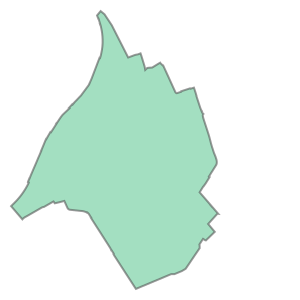

In [48]:
zh1.iloc[11]['geometry']

In [50]:
popfile = "Zurich_Pop_Dens_District.xlsx"
pop = pd.read_excel(popfile)
pop


,District,Population,Density,Area,district_id,Unnamed: 5
0,Kreis 1,5750,3194,1.80,1,NaN
1,Kreis 2,34877,3151,11.07,2,NaN
2,Kreis 3,50569,5846,8.65,3,NaN
3,Kreis 4,28729,9907,2.90,4,NaN
4,Kreis 5,15579,7829,1.99,5,NaN
5,Kreis 6,34321,6730,5.10,6,NaN
6,Kreis 7,38191,2543,15.02,7,NaN
7,Kreis 8,16788,3490,4.81,8,NaN
8,Kreis 9,55765,4620,12.07,9,NaN
9,Kreis 10,40341,4438,9.09,10,NaN


In [51]:
# Merge shapefile with population data
pop_geo = zh1.merge(pop, left_on = "bezeichnun", right_on = "District")
pop_geo

,objid,bezeichnun,name,entstehung,geometry,District,Population,Density,Area,district_id,Unnamed: 5
0,6,Kreis 7,7.0,6,"POLYGON ((2683860.979 1246723.697, 2683862.124...",Kreis 7,38191,2543,15.02,7,NaN
1,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,NaN
2,4,Kreis 9,9.0,4,"POLYGON ((2680390.466 1248340.821, 2680389.532...",Kreis 9,55765,4620,12.07,9,NaN
3,8,Kreis 2,2.0,4,"POLYGON ((2682296.566 1247016.328, 2682356.984...",Kreis 2,34877,3151,11.07,2,NaN
4,12,Kreis 10,10.0,4,"POLYGON ((2680537.632 1249894.533, 2680532.138...",Kreis 10,40341,4438,9.09,10,NaN
5,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,NaN
6,11,Kreis 12,12.0,4,"POLYGON ((2686417.046 1249238.353, 2686380.457...",Kreis 12,32483,5441,5.97,12,12.0
7,1,Kreis 6,6.0,4,"POLYGON ((2684316.434 1250651.586, 2684314.614...",Kreis 6,34321,6730,5.10,6,NaN
8,9,Kreis 8,8.0,6,"POLYGON ((2684280.850 1243932.550, 2683368.541...",Kreis 8,16788,3490,4.81,8,NaN
9,2,Kreis 4,4.0,1,"POLYGON ((2682296.566 1247016.328, 2682280.117...",Kreis 4,28729,9907,2.90,4,NaN


In [ ]:
pop_geo2["shops_per_density_times_1000"] = pop_geo2["num_all"].divide(pop_geo2["Density"])* 1000
pop_geo2["migros_per_density_times_1000"] = pop_geo2["num_migros"].divide(pop_geo2["Density"])* 1000
pop_geo2









In [52]:
pop_geo.to_csv("pop_dens_districts.csv")

In [79]:
shopfile = "data/ZH_supermarkets_output_districts.xlsx"
shop = pd.read_excel(shopfile, sheet_name=1)
shop

,Unnamed: 0,PLZ,num_all,num_migros,POP,NAME,Pop_per_market,District,Quarter
0,10,8046,1,0,28690,Zürich,28690,Kreis 11,Affoltern
1,13,8051,1,0,26059,Zürich,26059,Kreis 12,NaN
2,16,8057,1,0,24352,Zürich,24352,Kreis 11,NaN
3,5,8008,1,0,23410,Zürich,23410,Kreis 8,NaN
4,14,8052,1,0,22909,Zürich,22909,Kreis 11,NaN
5,15,8055,1,0,21971,Zürich,21971,Kreis 3,NaN
6,8,8037,1,1,17998,Zürich,17998,Kreis 10,NaN
7,7,8032,2,0,23402,Zürich,11701,Kreis 7,NaN
8,12,8050,3,0,33902,Zürich,11301,Kreis 12,NaN
9,11,8048,4,0,33933,Zürich,8483,Kreis 9,NaN


In [65]:
pop_geo2 = pop_geo.merge(shop, left_on = "bezeichnun", right_on = "District")
pop_geo2


,objid,bezeichnun,name,entstehung,geometry,District_x,Population,Density,Area,district_id,Unnamed: 5,Unnamed: 0,PLZ,num_all,num_migros,POP,NAME,Pop_per_market,District_y,Quarter
0,6,Kreis 7,7.0,6,"POLYGON ((2683860.979 1246723.697, 2683862.124...",Kreis 7,38191,2543,15.02,7,NaN,7,8032,2,0,23402,Zürich,11701,Kreis 7,NaN
1,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,NaN,10,8046,1,0,28690,Zürich,28690,Kreis 11,Affoltern
2,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,NaN,16,8057,1,0,24352,Zürich,24352,Kreis 11,NaN
3,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,NaN,14,8052,1,0,22909,Zürich,22909,Kreis 11,NaN
4,4,Kreis 9,9.0,4,"POLYGON ((2680390.466 1248340.821, 2680389.532...",Kreis 9,55765,4620,12.07,9,NaN,11,8048,4,0,33933,Zürich,8483,Kreis 9,NaN
5,12,Kreis 10,10.0,4,"POLYGON ((2680537.632 1249894.533, 2680532.138...",Kreis 10,40341,4438,9.09,10,NaN,8,8037,1,1,17998,Zürich,17998,Kreis 10,NaN
6,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,NaN,15,8055,1,0,21971,Zürich,21971,Kreis 3,NaN
7,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,NaN,9,8045,2,0,13315,Zürich,6658,Kreis 3,NaN
8,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,NaN,2,8003,4,0,23749,Zürich,5937,Kreis 3,NaN
9,11,Kreis 12,12.0,4,"POLYGON ((2686417.046 1249238.353, 2686380.457...",Kreis 12,32483,5441,5.97,12,12.0,13,8051,1,0,26059,Zürich,26059,Kreis 12,NaN


In [ ]:
pop_geo21 = pop_geo2.group

In [75]:
pop_geo2["shops_per_density_times_1000"] = pop_geo2["num_all"].divide(pop_geo2["Density"])* 1000
pop_geo2["migros_per_density_times_1000"] = pop_geo2["num_migros"].divide(pop_geo2["Density"])* 1000
pop_geo2

,objid,bezeichnun,name,entstehung,geometry,District_x,Population,Density,Area,district_id,...,num_all,num_migros,POP,NAME,Pop_per_market,District_y,Quarter,migros_per_density,shops_per_density_times_1000,migros_per_density_times_1000
0,6,Kreis 7,7.0,6,"POLYGON ((2683860.979 1246723.697, 2683862.124...",Kreis 7,38191,2543,15.02,7,...,2,0,23402,Zürich,11701,Kreis 7,NaN,0.786473,0.786473,0.000000
1,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,28690,Zürich,28690,Kreis 11,Affoltern,0.178126,0.178126,0.000000
2,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,24352,Zürich,24352,Kreis 11,NaN,0.178126,0.178126,0.000000
3,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,22909,Zürich,22909,Kreis 11,NaN,0.178126,0.178126,0.000000
4,4,Kreis 9,9.0,4,"POLYGON ((2680390.466 1248340.821, 2680389.532...",Kreis 9,55765,4620,12.07,9,...,4,0,33933,Zürich,8483,Kreis 9,NaN,0.865801,0.865801,0.000000
5,12,Kreis 10,10.0,4,"POLYGON ((2680537.632 1249894.533, 2680532.138...",Kreis 10,40341,4438,9.09,10,...,1,1,17998,Zürich,17998,Kreis 10,NaN,0.225327,0.225327,0.225327
6,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,1,0,21971,Zürich,21971,Kreis 3,NaN,0.171057,0.171057,0.000000
7,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,2,0,13315,Zürich,6658,Kreis 3,NaN,0.342114,0.342114,0.000000
8,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,4,0,23749,Zürich,5937,Kreis 3,NaN,0.684229,0.684229,0.000000
9,11,Kreis 12,12.0,4,"POLYGON ((2686417.046 1249238.353, 2686380.457...",Kreis 12,32483,5441,5.97,12,...,1,0,26059,Zürich,26059,Kreis 12,NaN,0.183790,0.183790,0.000000


In [76]:
pop_geo2.to_csv("shop_density_districts.csv")

In [71]:
shop2 = "data/Supermarkets_Zurich_ZipCodes.csv"
shops = pd.read_csv(shop2, engine="python")
shops

,Name,coordinates,Adress,Rating,Total Users Rates,Zip Codes
0,Coop Supermarkt Z�rich Maagplatz,"{'location': {'lat': 47.3859637, 'lng': 8.5161...","Maagpl. 1, 8005 Z�rich",4.0,53,8005
1,Coop Supermarkt Z�rich Puls 5,"{'location': {'lat': 47.3908056, 'lng': 8.5178...","Giessereistrasse 18, 8005 Z�rich",4.0,171,8005
2,Migros Supermarkt,"{'location': {'lat': 47.391336, 'lng': 8.51855...","Hardturmstrasse 11, 8005 Z�rich",4.3,191,8005
3,Ege,"{'location': {'lat': 47.3801077, 'lng': 8.5243...","Feldstrasse 133, 8004 Z�rich",4.5,214,8004
4,Coop Supermarkt Z�rich Hohlstrasse,"{'location': {'lat': 47.3771218, 'lng': 8.5264...","Hohlstrasse 35, 8004 Z�rich",4.1,251,8004
...,...,...,...,...,...,...
75,OTTO'S AG,"{'location': {'lat': 47.4531582, 'lng': 8.5809...","Schaffhauserstrasse 146, 8302 Kloten",4.1,270,8302
76,MANOR Rapperswil,"{'location': {'lat': 47.22651210000001, 'lng':...","Neue Jonastrasse 20, 8640 Rapperswil-Jona",4.2,880,8640
77,Jelmoli Versand AG,"{'location': {'lat': 47.4568327, 'lng': 8.4037...","Industriestrasse 19, 8112 Otelfingen",3.3,194,8112
78,MANOR Baden,"{'location': {'lat': 47.4735828, 'lng': 8.3069...","Schlossbergpl. 7, 5400 Baden",4.2,1554,5400


In [63]:
shops_zip = shops.groupby(['Zip Codes']).sum()
shops_zip

,Rating,Total Users Rates
Zip Codes,,
5400,4.2,1554
8001,58.1,11945
8003,18.2,839
8004,38.0,2250
8005,67.1,4007
8008,4.8,24
8021,4.0,689
8032,9.2,53
8037,4.0,120


In [80]:
pop_geo2

,objid,bezeichnun,name,entstehung,geometry,District_x,Population,Density,Area,district_id,...,num_all,num_migros,POP,NAME,Pop_per_market,District_y,Quarter,migros_per_density,shops_per_density_times_1000,migros_per_density_times_1000
0,6,Kreis 7,7.0,6,"POLYGON ((2683860.979 1246723.697, 2683862.124...",Kreis 7,38191,2543,15.02,7,...,2,0,23402,Zürich,11701,Kreis 7,NaN,0.786473,0.786473,0.000000
1,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,28690,Zürich,28690,Kreis 11,Affoltern,0.178126,0.178126,0.000000
2,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,24352,Zürich,24352,Kreis 11,NaN,0.178126,0.178126,0.000000
3,10,Kreis 11,11.0,4,"POLYGON ((2684316.434 1250651.586, 2684301.897...",Kreis 11,75344,5614,13.42,11,...,1,0,22909,Zürich,22909,Kreis 11,NaN,0.178126,0.178126,0.000000
4,4,Kreis 9,9.0,4,"POLYGON ((2680390.466 1248340.821, 2680389.532...",Kreis 9,55765,4620,12.07,9,...,4,0,33933,Zürich,8483,Kreis 9,NaN,0.865801,0.865801,0.000000
5,12,Kreis 10,10.0,4,"POLYGON ((2680537.632 1249894.533, 2680532.138...",Kreis 10,40341,4438,9.09,10,...,1,1,17998,Zürich,17998,Kreis 10,NaN,0.225327,0.225327,0.225327
6,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,1,0,21971,Zürich,21971,Kreis 3,NaN,0.171057,0.171057,0.000000
7,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,2,0,13315,Zürich,6658,Kreis 3,NaN,0.342114,0.342114,0.000000
8,7,Kreis 3,3.0,4,"POLYGON ((2682296.566 1247016.328, 2682253.264...",Kreis 3,50569,5846,8.65,3,...,4,0,23749,Zürich,5937,Kreis 3,NaN,0.684229,0.684229,0.000000
9,11,Kreis 12,12.0,4,"POLYGON ((2686417.046 1249238.353, 2686380.457...",Kreis 12,32483,5441,5.97,12,...,1,0,26059,Zürich,26059,Kreis 12,NaN,0.183790,0.183790,0.000000


In [108]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_geo2.to_json())

In [109]:
# Define color palettes
palette = brewer['YlGnBu'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 6)

# Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal",
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = "Shop Density", 
           plot_height = 600, plot_width = 600, 
           toolbar_location = "below",
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
states = p.patches("xs","ys", source = geosource,
                   fill_color = {"field" :'shops_per_density_times_1000',
                                 "transform" : color_mapper},
                   line_color = "blue", 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [("District", "@bezeichnun"),
                                    ('Population Density per km2','@Density'),
                                    ('shops_per_density_times_1000','@shops_per_density_times_1000'),
                                    ('migros_per_density_times_1000','@migros_per_density_times_1000'),
                                    ('Population','@Population'),
                                 ]))
# Specify layout
p.add_layout(color_bar, "below")
output_file("District_Population_Density.html")
show(p)